In [32]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline

Import required libraries.
<p>linear_model for Linear Regression</p>
<p>tree for Decision Tree</p>

# 1. Linear Regression

## Prepare Data

y = x/2 + sin(x) + N(0,1)

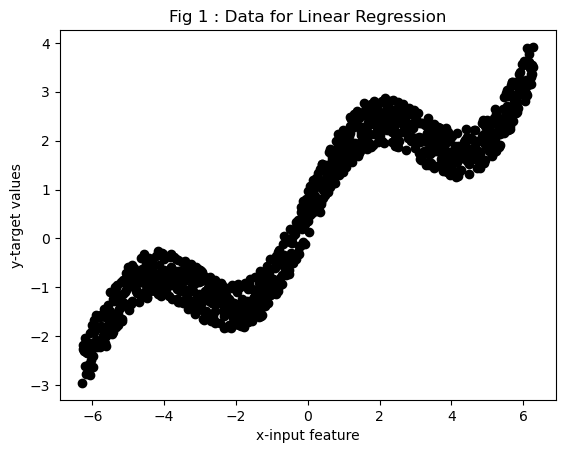

In [4]:
number_of_samples = 1000
x = np.linspace(-2*np.pi,2*np.pi,number_of_samples)
y = 0.5*x + np.sin(x) + np.random.random(x.shape)
plt.scatter(x, y, color='black')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1 : Data for Linear Regression')
plt.show()

## Split the dataset into training, validation and test sets

In [19]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:700]]
y_train = y[random_indices[:700]]
#Validation set
x_val = x[random_indices[700:850]]
y_val = y[random_indices[700:850]]
#Test set
x_test = x[random_indices[850:]]
y_test = y[random_indices[850:]]

## Fit regression line to the data

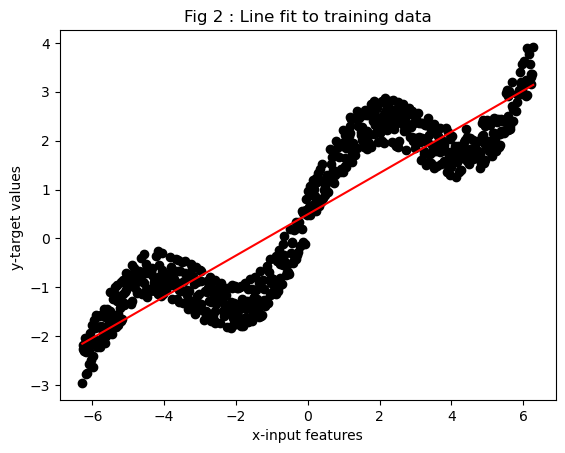

In [20]:
model = linear_model.LinearRegression()

x_train_for_line_fitting = x_train.reshape(len(x_train),1)
y_train_for_line_fitting = y_train.reshape(len(y_train),1)

model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

#Plot the line
plt.scatter(x_train, y_train, color='black')
plt.plot(x.reshape(len(x),1), model.predict(x.reshape(len(x),1)), color='red')
plt.xlabel('x-input features')
plt.ylabel('y-target values ')
plt.title('Fig 2 : Line fit to training data')
plt.show()

## Evaluate the model

In [21]:
mean_val_error = np.mean((y_val - model.predict(x_val.reshape(len(x_val),1)))**2)
mean_test_error = np.mean((y_test - model.predict(x_test.reshape(len(x_test),1)))**2)
print("Validation MSE: ",mean_val_error, "\nTest MSE: ",mean_test_error)

Validation MSE:  5.291764307482035 
Test MSE:  4.787976237988497


# 2. Logistic Regression

## Prepare the data

In [19]:
iris = datasets.load_iris()
X = iris.data[:,:2] # Choosing only the first two input features
X.shape

(150, 2)

In [3]:
Y = iris.target
# the first 50 samples are of class 0 and the next 50 samples are of class 1
X = X[:100]
Y = Y[:100]

## Split the dataset into training set and test set

In [4]:
number_of_samples = 100
random_indices = np.random.permutation(number_of_samples)
x_train = X[random_indices[:80]]
y_train = Y[random_indices[:80]]
x_test = X[random_indices[80:]]
y_test = Y[random_indices[80:]]

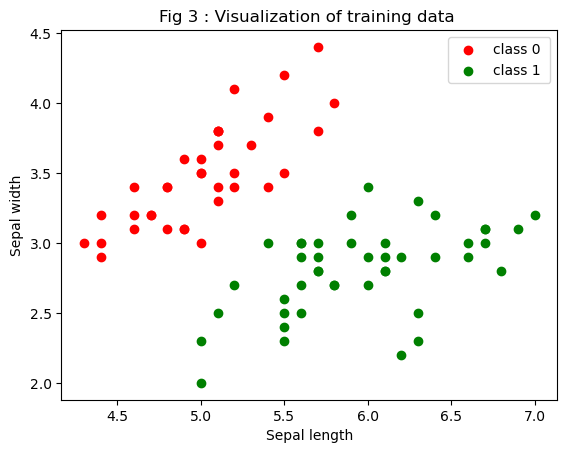

In [6]:
#Visualizing the training data
X_class0 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i] == 0])
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int32)
X_class1 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i] == 1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int32)

plt.scatter(X_class0[:,0],X_class0[:,1],color='red')
plt.scatter(X_class1[:,0],X_class1[:,1],color='green')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(['class 0 ','class 1 '])
plt.title('Fig 3 : Visualization of training data ')
plt.show()

## Fit Logistic Regression model

In [7]:
model = linear_model.LogisticRegression(C=1e5)
model.fit(x_train,y_train)

LogisticRegression(C=100000.0)

In [8]:
model.predict(x_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

# 3. Decision Tree regressor

## Prepare Data

y = x/2 + sin(x) + N(0,1)

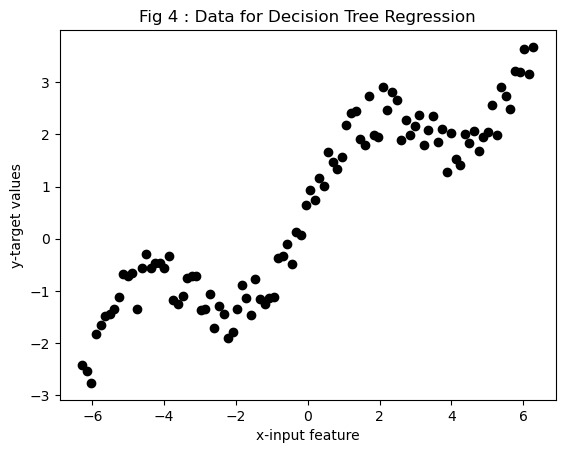

In [16]:
number_of_samples = 100
x = np.linspace(-2*np.pi, 2*np.pi, number_of_samples)
y = 0.5*x + np.sin(x) + np.random.random(x.shape)
plt.scatter(x, y, color='black')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 4 : Data for Decision Tree Regression')
plt.show()

## Split data into training and test sets

In [23]:
random_indices = np.random.permutation(number_of_samples)
x_train = x[random_indices[:80]]
y_train = y[random_indices[:80]]
x_test = x[random_indices[80:]]
y_test = y[random_indices[80:]]

## Fit a line to the data

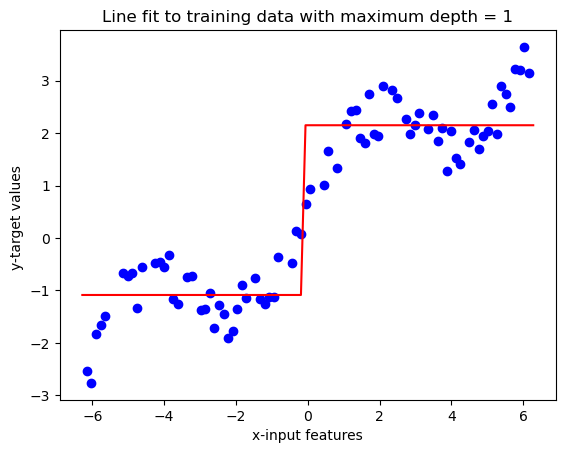

Training MSE:  0.3931203632163248 
Test MSE:  0.5553681600738053


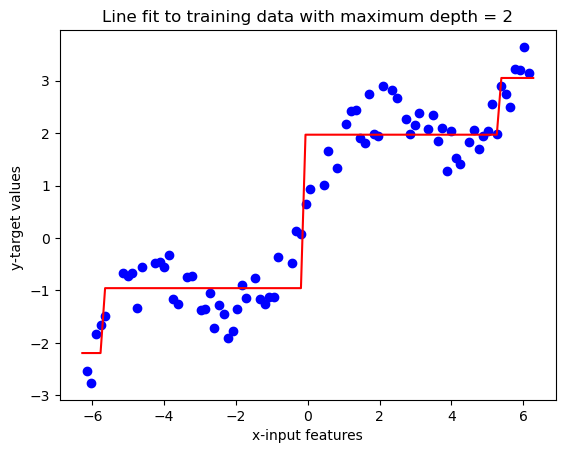

Training MSE:  0.23954431271504148 
Test MSE:  0.28805316382793533


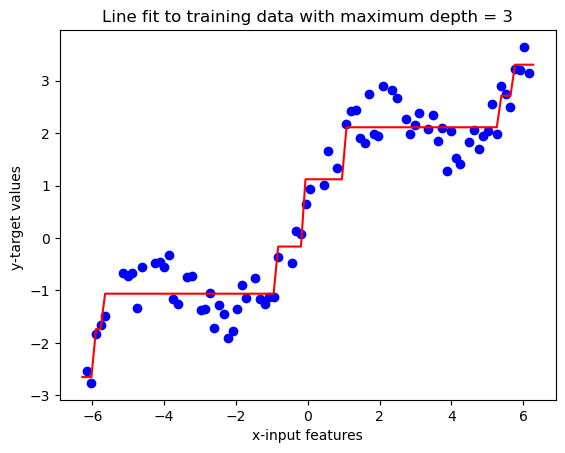

Training MSE:  0.133405185862116 
Test MSE:  0.11552584650931555


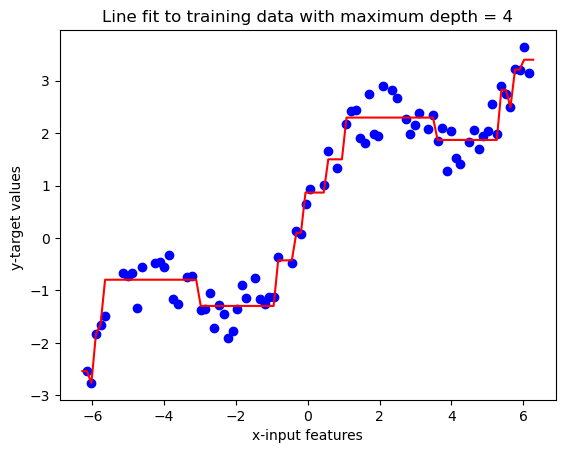

Training MSE:  0.08208601901335599 
Test MSE:  0.10083574322719684


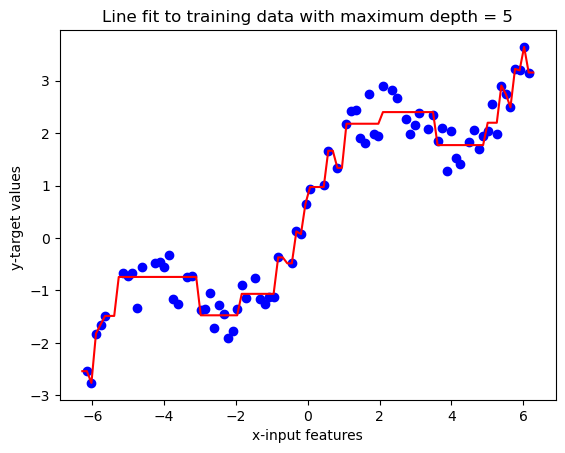

Training MSE:  0.0563524936526396 
Test MSE:  0.09777126641981733


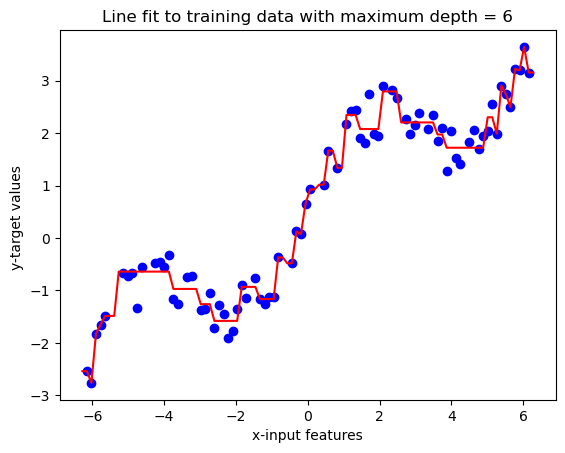

Training MSE:  0.0363150165180509 
Test MSE:  0.08772611655886442


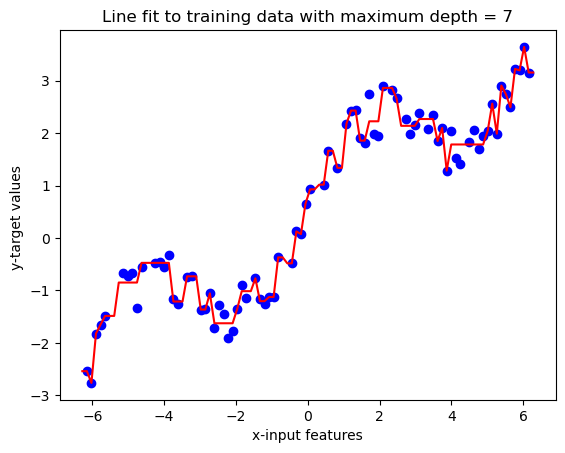

Training MSE:  0.01940556212227228 
Test MSE:  0.07025272473723188


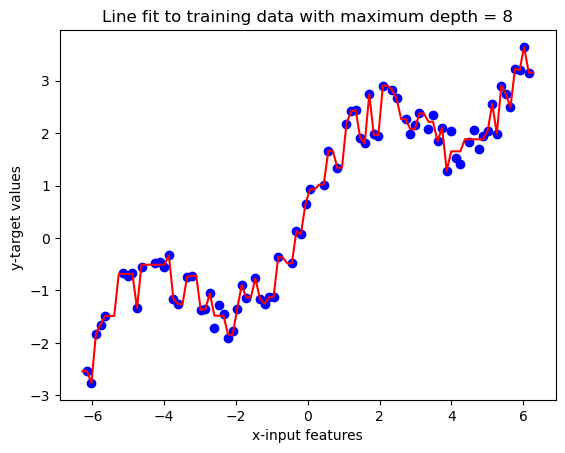

Training MSE:  0.005846689005138681 
Test MSE:  0.08182445852424716


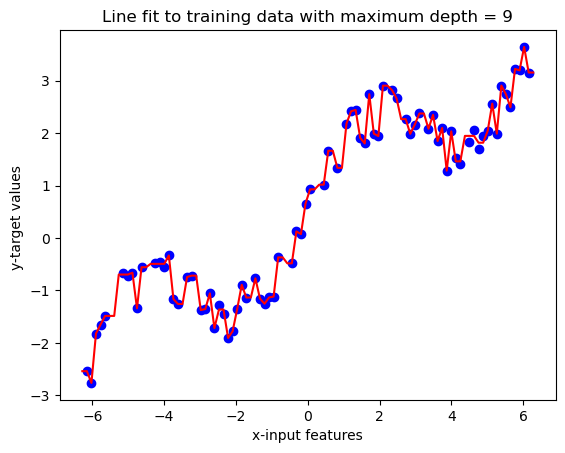

Training MSE:  0.0010756280099553821 
Test MSE:  0.08206913706565588


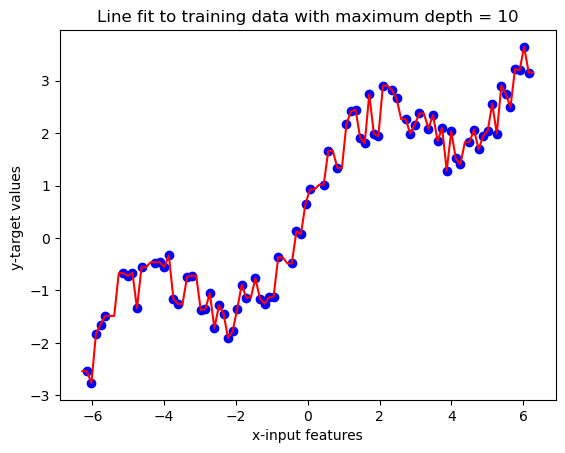

Training MSE:  6.735396620719096e-07 
Test MSE:  0.08479762772026064


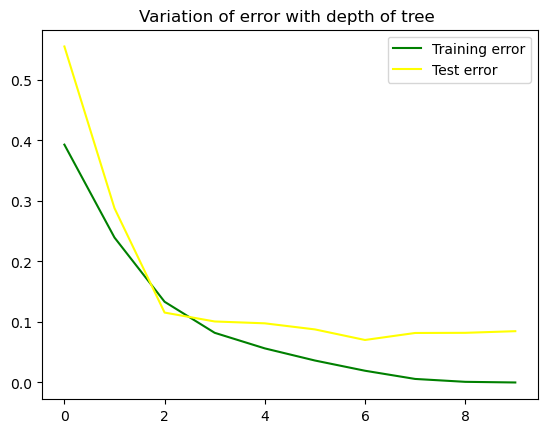

In [24]:
max_depth_of_tree = np.arange(10)+1
train_err_arr = []
test_err_arr = []

for depth in max_depth_of_tree:
    model = tree.DecisionTreeRegressor(max_depth = depth)
    x_train_for_line_fitting = x_train.reshape(len(x_train),1)
    y_train_for_line_fitting = y_train.reshape(len(y_train),1)
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color = 'blue')
    plt.plot(x.reshape(len(x),1), model.predict(x.reshape(len(x),1)), color='red')
    plt.xlabel('x-input features')
    plt.ylabel('y-target values ')
    plt.title('Line fit to training data with maximum depth = '+str(depth))
    plt.show()

    mean_train_error = np.mean((y_train - model.predict(x_train.reshape(len(x_train),1)))**2)
    mean_test_error = np.mean((y_test - model.predict(x_test.reshape(len(x_test),1)))**2)
    
    train_err_arr.append(mean_train_error)
    test_err_arr.append(mean_test_error)
    print("Training MSE: ", mean_train_error, '\nTest MSE: ', mean_test_error)
plt.figure()
plt.plot(train_err_arr, color='green')
plt.plot(test_err_arr, color='yellow')
plt.legend(['Training error','Test error'])
plt.title('Variation of error with depth of tree ')
plt.show()

# 4. Decision tree Classifier

## Preparing and splitting the data

In [28]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

number_of_samples = len(y)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.8)
x_train = x[random_indices[:num_training_samples]]
y_train = y[random_indices[:num_training_samples]]
x_test = x[random_indices[num_training_samples:]]
y_test = y[random_indices[num_training_samples:]]


## Fit the model

In [29]:
model = tree.DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
model.predict(x_test)

array([1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0,
       1, 2, 0, 0, 1, 2, 2, 2])

In [40]:
number_of_misclass=0
for i in range(len(x_test)):
    if model.predict(x_test)[i] != y_test[i]:
        number_of_misclass+=1
        print(y_test[i],'    -    ',model.predict(x_test)[i])
print(number_of_misclass)

1     -     2
2     -     1
2


## Visualize the tree

In [34]:
from six import StringIO
import pydot
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)


ModuleNotFoundError: No module named 'pydot'